# Your Task
- Your challenge involves working with the “Global Terrorism Database” from the National Consortium for the Study of Terrorism and Responses to Terrorism (START). This dataset is a rich source of information on terrorist activities worldwide.

*Dataset Link: Global Terrorism Database*

1. Data Cleaning:
- Initial Assessment: Load the dataset and conduct a preliminary assessment to understand its structure and content.
- Handling Inconsistencies: Identify and address missing values, incorrect data types, and data inconsistencies.


2. Data Transformation:
- Categorical Transformation: Convert categorical data into a format suitable for analysis, such as one-hot encoding.
- Numerical Normalization: Normalize or standardize numerical features as required.


3. Exploratory Data Analysis:
- Data Exploration: Conduct exploratory data analysis on the cleaned and integrated dataset.
- Visualization: Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W7/D3/DAILY CHALLENGE/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1', low_memory =False)
df.head()

,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, ï»¿eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [3]:
df.head(10)


,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiquÃ to a lo...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
df.shape


(181691, 135)

In [5]:
df.columns


Index(['ï»¿eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
pd.set_option('display.max_rows', None)

# Display only columns with null values
df_isnull = df.isnull().sum()
print(df_isnull[df_isnull > 0])

approxdate            172452
resolution            179471
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
location              126196
summary                66129
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targsubtype1           10373
targsubtype1_txt       10373
corp1                  42552
target1                  638
natlty1                 1559
natlty1_txt             1559
targtype2             170547
targtype2_txt         170547
targsubtype2          171006
targsubtype2_txt      171006
corp2                 171574
target2               170671
natlty2               170863
natlty2_txt           170863
targtype3             180515
targtype3_txt         180515
targsubtype3          180594
targsubtype3_t

In [7]:
df.describe()


,ï»¿eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.rename(columns= {'ï»¿eventid': 'Event ID',
                    'iyear':'Year',
                    'imonth':'Month',
                    'country_txt':'Country',
                    'region_txt':'Region',
                    'attacktype1_txt':'AttackType',
                    'target1':'Target1',
                    'nkill':'Killed',
                    'nwound':'wounded',
                    'summary':'Summary',
                    'gname':'Group',
                    'targetype1_txt':'Target_type',
                    'weaptye1_txt':'Weapon_type',
                    'motive':'Motive'},inplace=True)

In [9]:
import numpy as np

# Clean column names (remove non-ASCII characters, if any)
df.columns = df.columns.str.strip().str.replace(r'[^\x00-\x7F]+', '', regex=True)

threshold = 0.5
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

# Step 4: Check for any remaining null values
print(df_cleaned.isnull().sum())

Event ID            0
Year                0
Month               0
iday                0
extended            0
country             0
Country             0
region              0
Region              0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
Summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
AttackType          0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
Target1             0
natlty1             0
natlty1_txt         0
Group               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
Killed              0
nkillus   

In [10]:
df_cleaned.head()


,Event ID,Year,Month,iday,extended,country,Country,region,Region,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,...,0.038944,0.107163,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.038944,0.107163,0,1.0,Committee on Government Operations United Stat...,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.038944,0.107163,0,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.038944,0.107163,1,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.038944,0.107163,1,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1


In [11]:
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
skewness = df_cleaned[numerical_cols].skew()

print(skewness)

Event ID         -0.619156
Year             -0.619067
Month             0.006750
iday              0.019065
extended          4.370397
country           3.152161
region           -0.348260
latitude         -0.976053
longitude      -426.252131
specificity       2.159555
vicinity         -3.789433
crit1            -9.175880
crit2           -11.907267
crit3            -2.277071
doubtterr        -3.074590
multiple          2.101950
success          -2.486370
suicide           4.942699
attacktype1       1.546775
targtype1         0.459817
targsubtype1      0.436320
natlty1           3.325502
guncertain1       3.063886
individual       18.329873
nperps           69.733294
nperpcap         -8.680393
claimed          -8.936664
weaptype1         2.243913
weapsubtype1      0.258810
Killed           55.837699
nkillus         282.703517
nkillter         52.994367
wounded         183.114583
nwoundus        263.524291
nwoundte         64.046405
property         -2.272144
ishostkid       -12.604959
I

In [12]:
log_columns = ['nperps', 'nperpcap', 'claimed', 'nkillus', 'nwoundus', 'wounded', 'nwoundte', 'Killed', 'nkillter']
df_cleaned[log_columns] = df_cleaned[log_columns].apply(lambda x: np.log1p(x))  # log1p is log(x + 1) to handle zeros

print(df_cleaned[log_columns].skew())

nperps       1.855880
nperpcap     7.498484
claimed      2.512378
nkillus     26.858007
nwoundus    27.041739
wounded      1.444542
nwoundte    10.854214
Killed       1.474819
nkillter     3.907703
dtype: float64


# Columns with high skewness:

- nperps (Skew: 69.73)
- nperpcap (Skew: -8.68)
- claimed (Skew: -8.94)
- nkillus (Skew: 282.70)
- nkillter (Skew: 52.99)
- wounded (Skew: 183.11)
- nwoundus (Skew: 263.52)
- nwoundte (Skew: 64.05)
- Killed (Skew: 55.84)

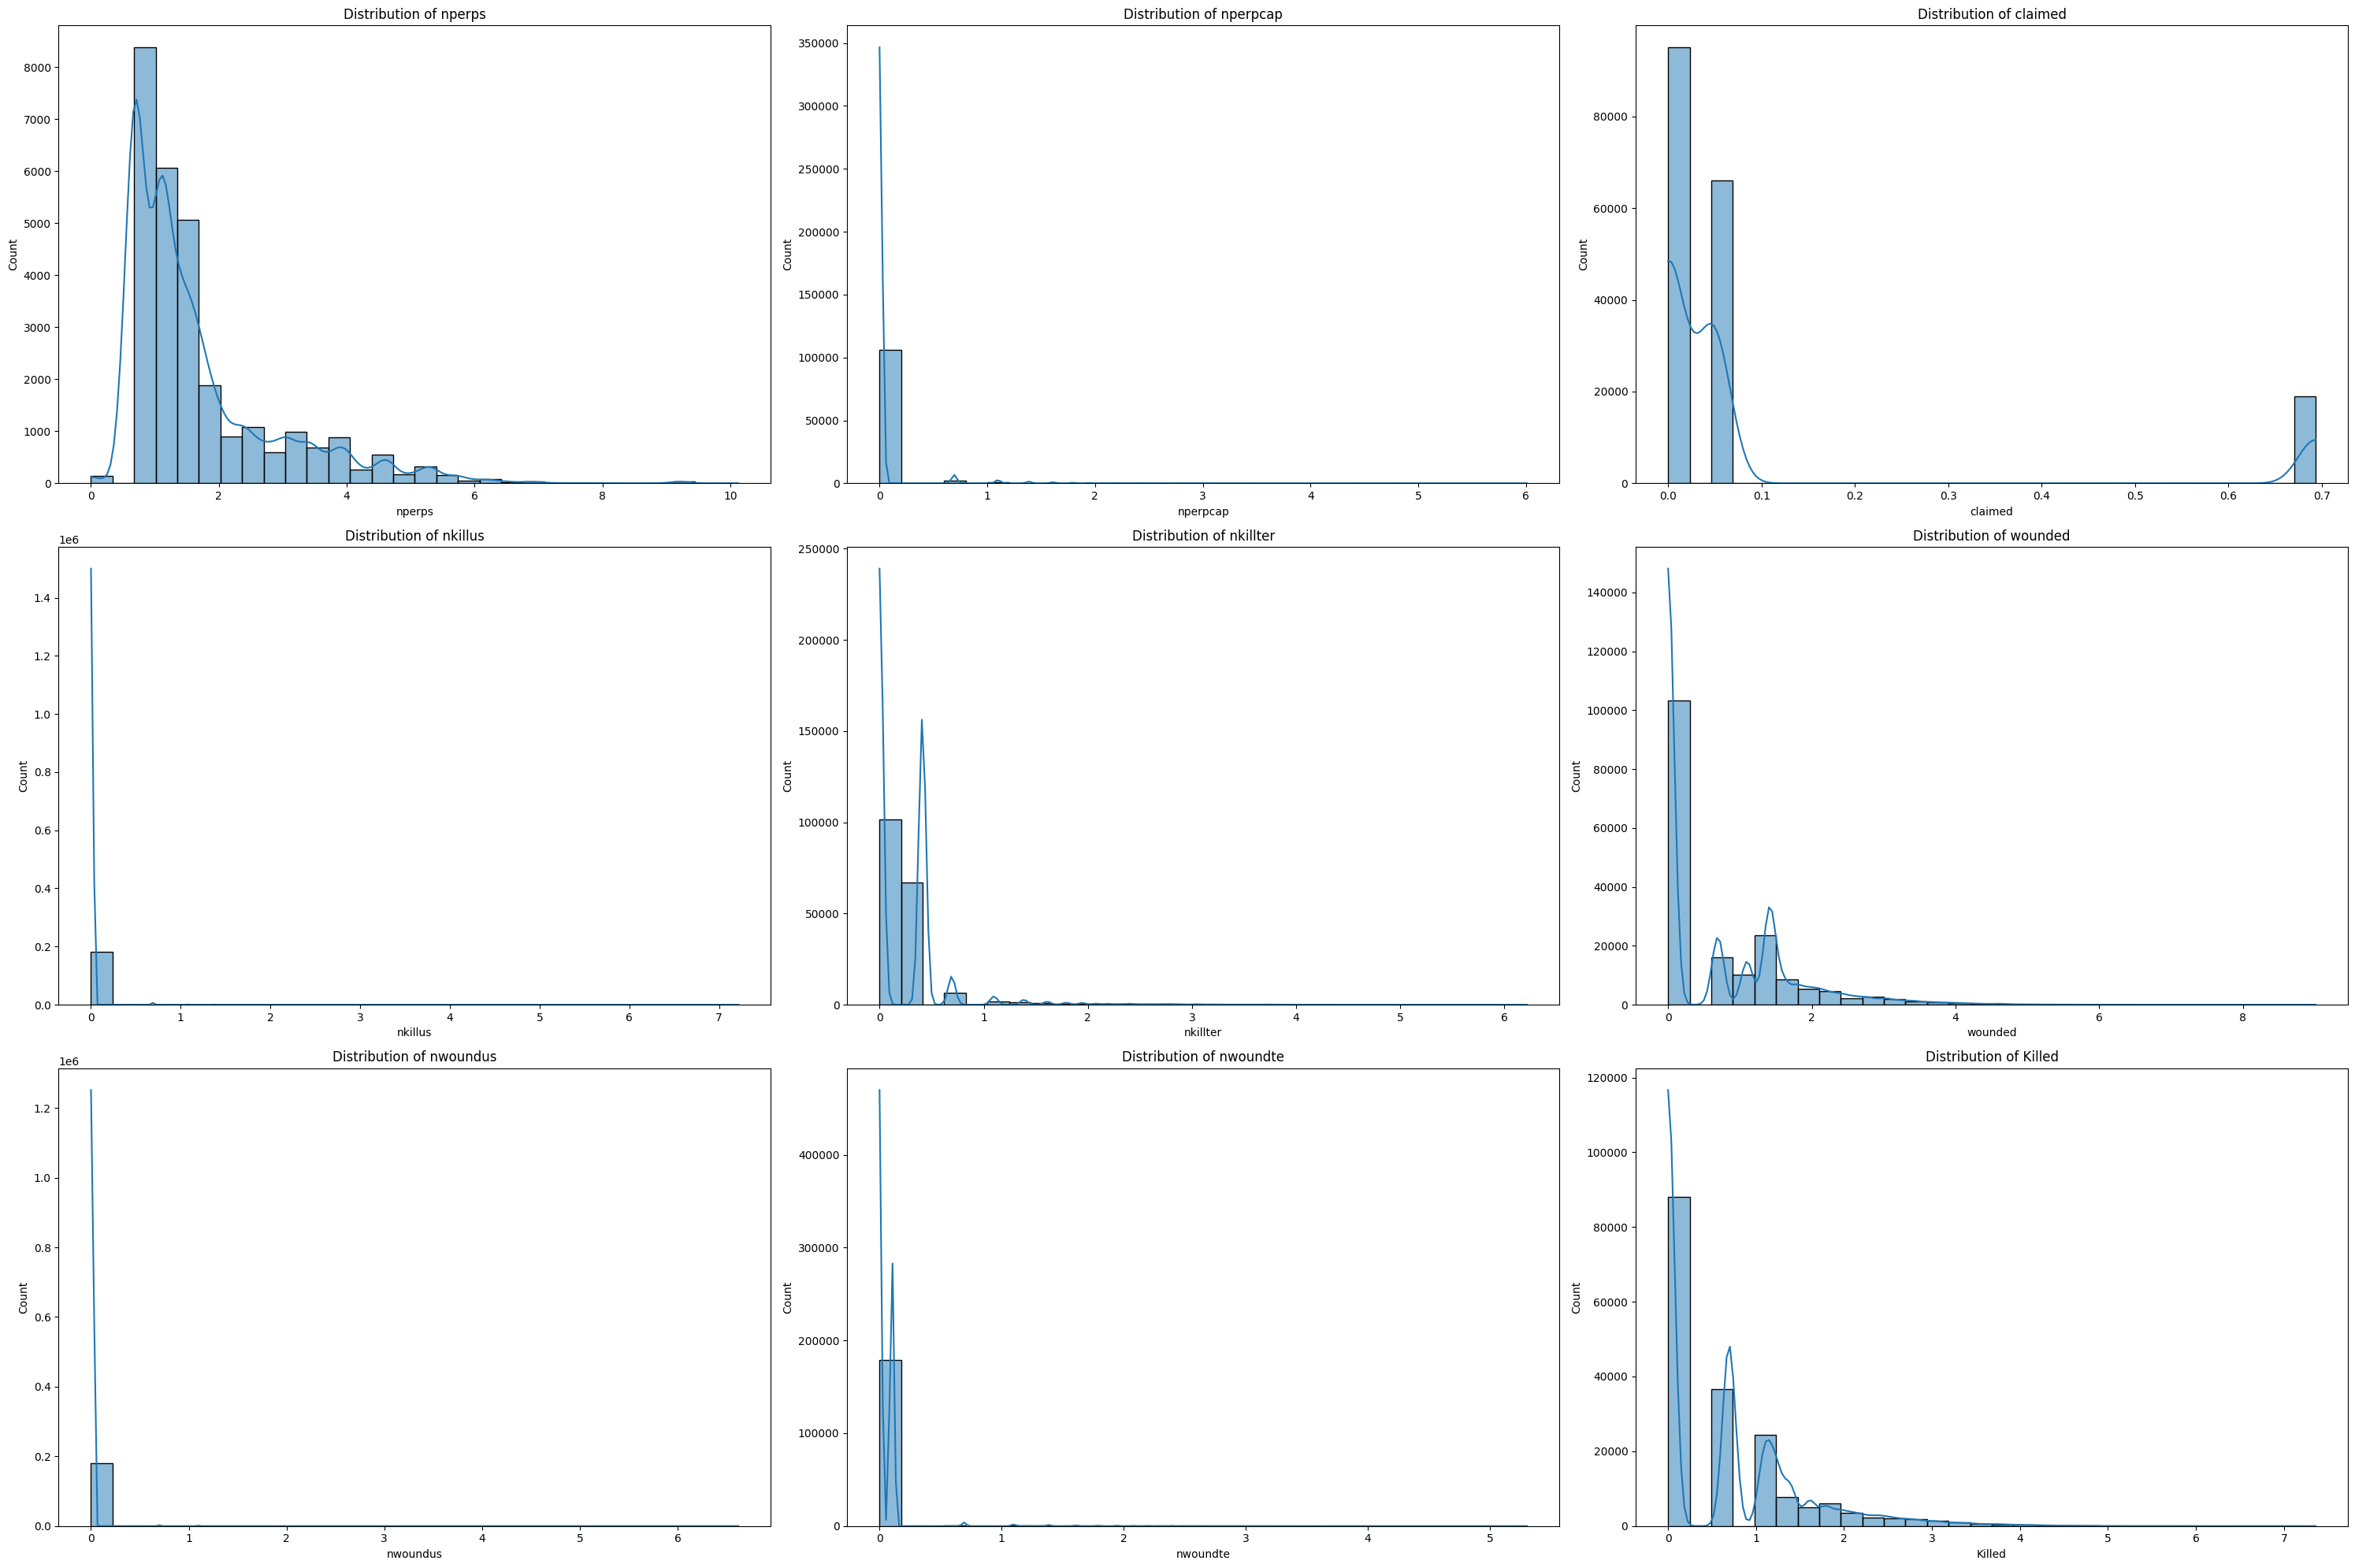

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for highly skewed columns
skewed_columns = ['nperps', 'nperpcap', 'claimed', 'nkillus', 'nkillter', 'wounded', 'nwoundus', 'nwoundte', 'Killed']
plt.figure(figsize=(30, 20))

for i, col in enumerate(skewed_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

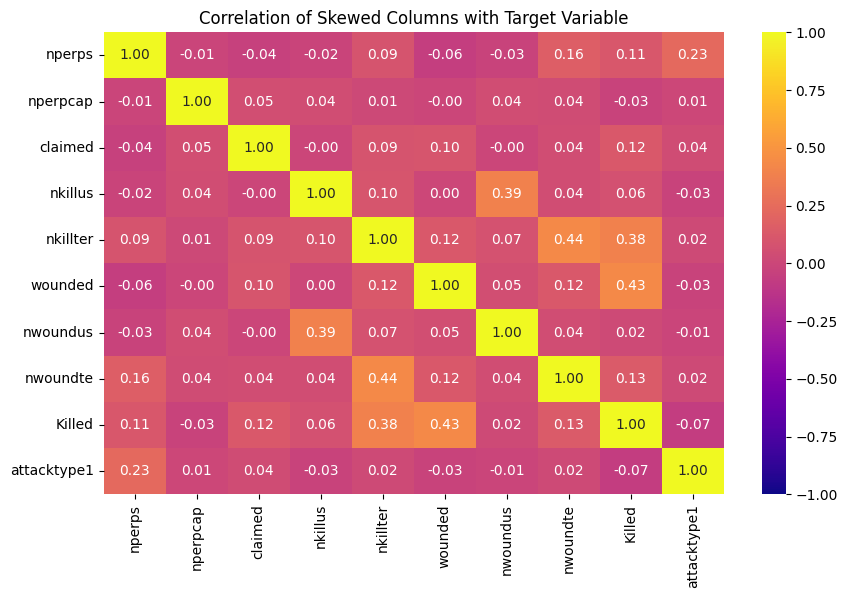

In [14]:
corr = df_cleaned[skewed_columns + ['attacktype1']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='plasma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Skewed Columns with Target Variable')
plt.show()

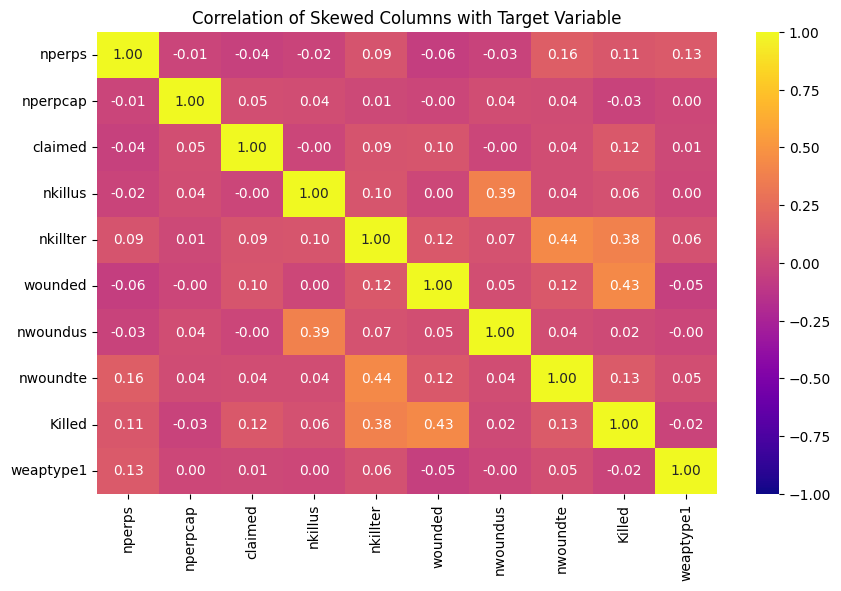

In [15]:
corr = df_cleaned[skewed_columns + ['weaptype1']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='plasma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Skewed Columns with Target Variable')
plt.show()

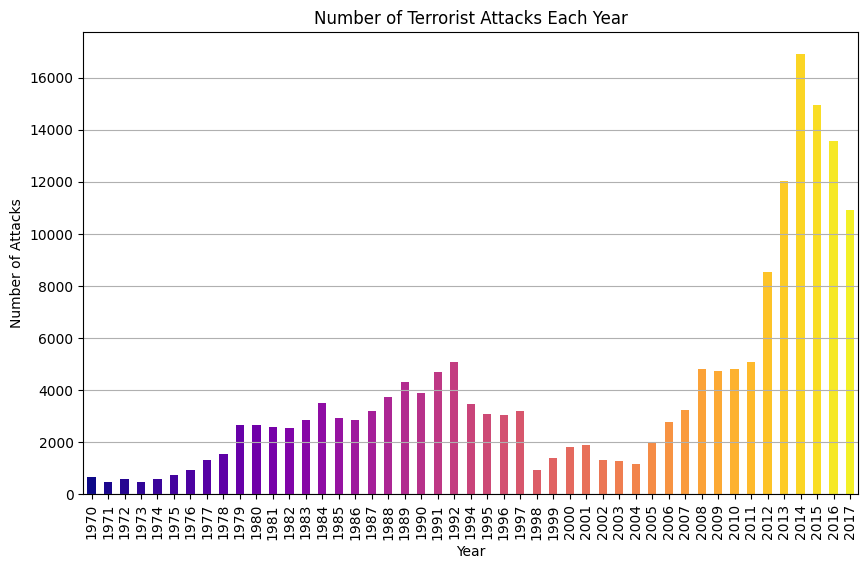

In [16]:
import matplotlib.pyplot as plt
import numpy as np

attacks_per_year = df_cleaned['Year'].value_counts().sort_index()

num_colors = len(attacks_per_year)
cmap = plt.get_cmap('plasma')  
colors = [cmap(i / num_colors) for i in range(num_colors)]

plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='bar', color=colors)
plt.title('Number of Terrorist Attacks Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.show()


In [17]:
import pandas as pd
import folium

df_filtered = df.dropna(subset=['latitude', 'longitude'])
map_center = [20, 0]
mymap = folium.Map(location=map_center, zoom_start=2)

for _, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(mymap)

mymap.save("attack_map.html")

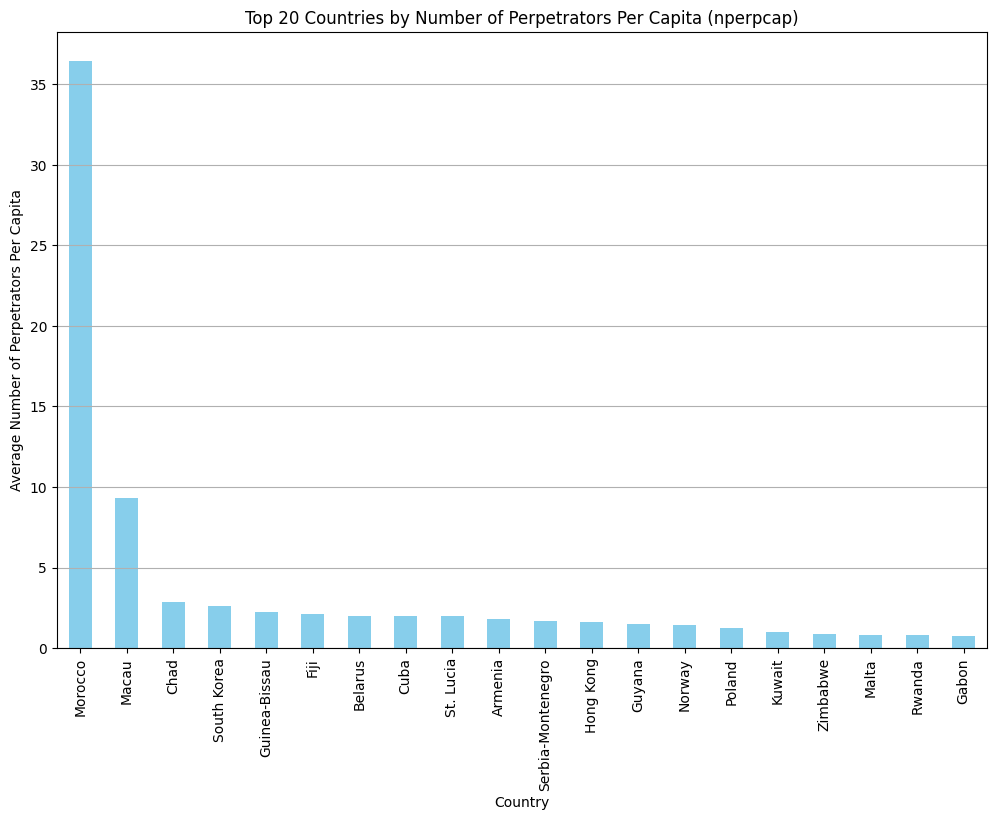

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df.dropna(subset=['Country', 'nperpcap'])

country_nperpcap = df_filtered.groupby('Country')['nperpcap'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
country_nperpcap.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Countries by Number of Perpetrators Per Capita (nperpcap)')
plt.xlabel('Country')
plt.ylabel('Average Number of Perpetrators Per Capita')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [19]:
import pandas as pd
import plotly.express as px

# Prepare the data by dropping rows with missing values for 'Country' and 'nperpcap'
df_filtered = df.dropna(subset=['Country', 'nperpcap'])

# Group by 'Country' and calculate the average 'nperpcap'
country_nperpcap = df_filtered.groupby('Country')['nperpcap'].mean().reset_index()

# Plot the choropleth map using Plotly Express
fig = px.choropleth(country_nperpcap,
                    locations='Country',  # The country column in the data
                    locationmode='country names',  # The type of locations (country names)
                    color='nperpcap',  # The value to color countries by
                    color_continuous_scale='Plasma',  # Color scale
                    labels={'nperpcap': 'Perpetrators per Capita'},  # Label for the color scale
                    title='Number of Perpetrators Per Capita by Country')

fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="mercator")

# Show the map
fig.show()

In [20]:
import pandas as pd
import plotly.express as px

df_filtered = df.dropna(subset=['Group', 'Killed'])
group_killed = df_filtered.groupby('Group')['Killed'].mean().reset_index()
group_killed = group_killed.sort_values(by='Killed', ascending=False).head(20)

fig = px.bar(group_killed, 
             x='Group', 
             y='Killed', 
             color='Killed', 
             title='Top 20 Terrorist Groups by Average Number of Killed',
             labels={'Killed': 'Average Number of Killed'},
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Terrorist Group',
    yaxis_title='Average Number of Killed',
    xaxis_tickangle=-45,
    autosize=False,
    width=1200,
    height=800
)

fig.show()